# Unet
##   1-Channel version: DWI
##   Trained on JAS

In [1]:
import sys
sys.path.append('../../')

# Loads all methods and data for testing
from Performance.methods_for_testing_Unet import *

/home/rosengaard/miniforge3/envs/medsam3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
channels = 1
model_path = '/home/rosengaard/mri-infarct-segmentation/PERFORMANCE/DUPONT_JAS/UNET/Weights_JAS_UnetC1.pth'
trained_on_dataset = "JAS"
type = "test"

In [3]:
# Load model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
m_state_dict = torch.load(model_path, map_location=torch.device(device))
model = UNet(n_class=1, n_channels=channels).to(device)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model.load_state_dict(m_state_dict)

<All keys matched successfully>

In [4]:
# Load data
test_data_path = os.path.join(current_directory, 'mri-infarct-segmentation/data/DUPONT/datasplit/FixedPath/test_data.csv')
testDataset = CustomDataset(test_data_path, channels, trained_on_dataset, type)
testDataLoader = torch.utils.data.DataLoader(testDataset,
                                            batch_size=1,
                                            shuffle=False,
                                            num_workers = 0
                                            )

/home/rosengaard/miniforge3/envs/medsam3.9/lib/python3.9/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


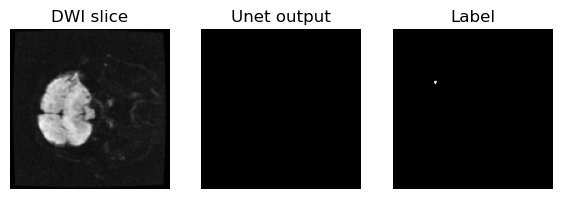

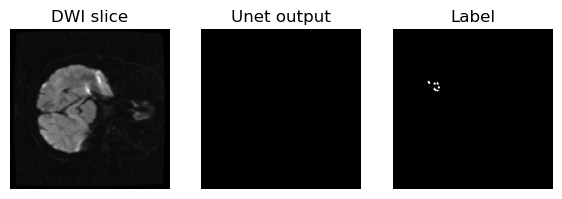

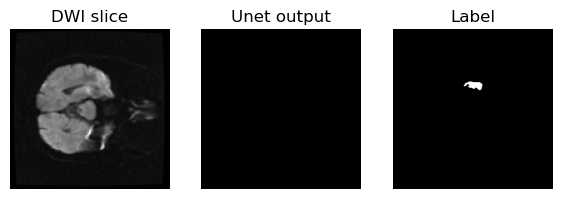

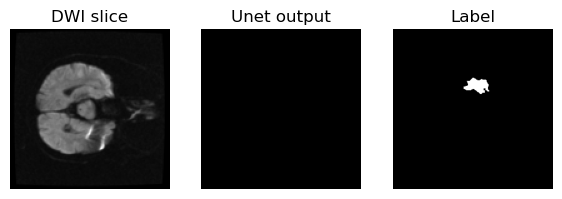

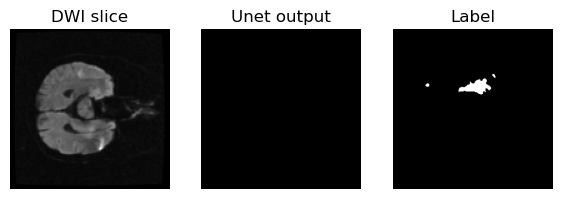

Dice for slice: 0.106


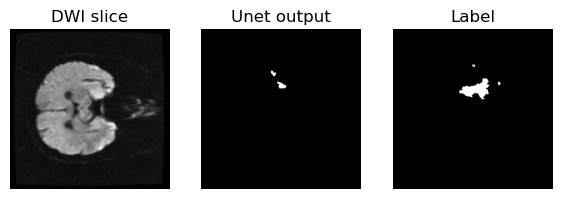

Dice for slice: 0.095


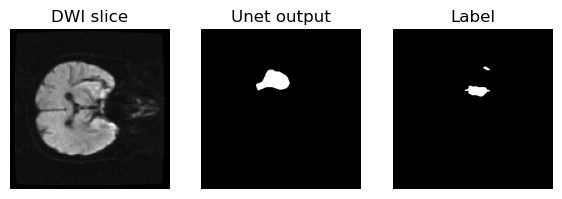

Dice for slice: 0.082


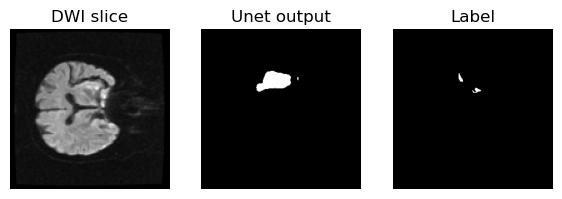

Dice for slice: 0.058


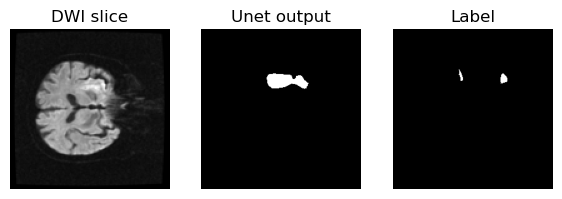

Dice for slice: 0


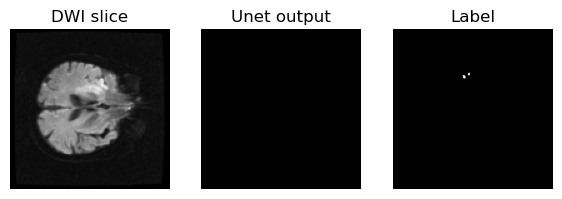

Mean slice dice for subject: 0.068
Volume dice for subject: 0.058
__________________________________


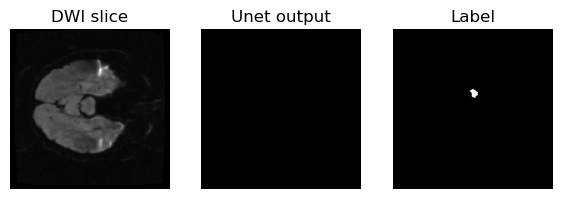

Dice for slice: 0
Dice for slice: 0
Dice for slice: 0
Dice for slice: 0
Dice for slice: 0
Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


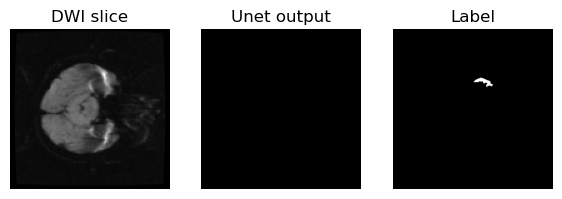

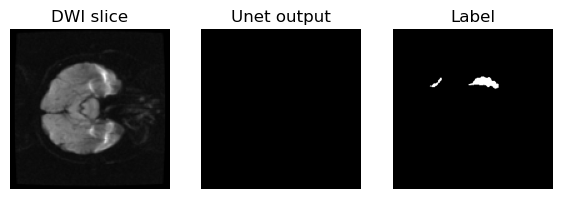

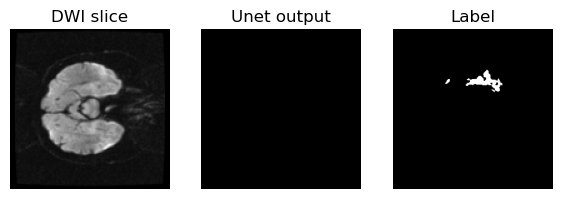

Dice for slice: 0.0


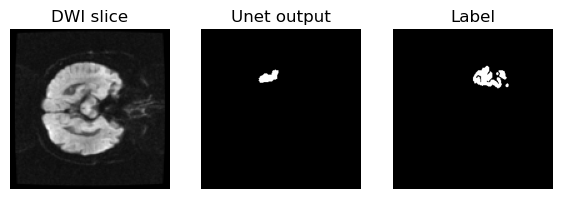

Dice for slice: 0.376


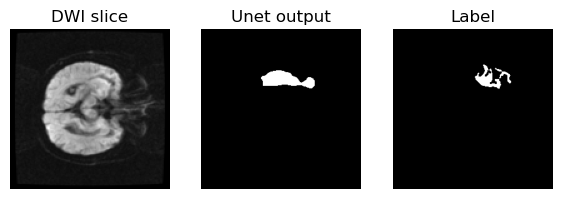

Dice for slice: 0.252


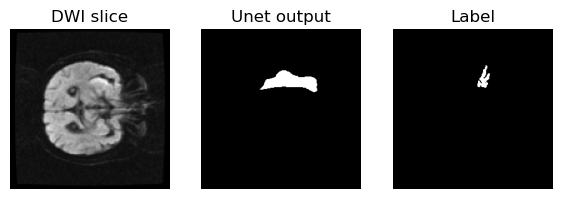

Dice for slice: 0.105


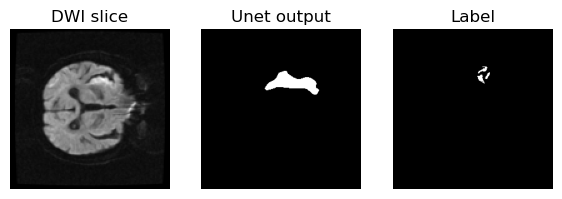

Dice for slice: 0.269


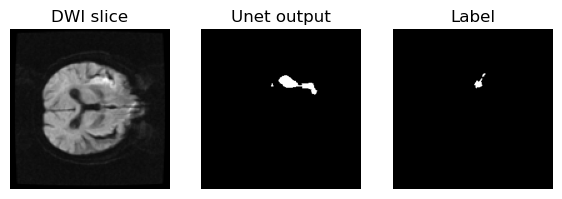

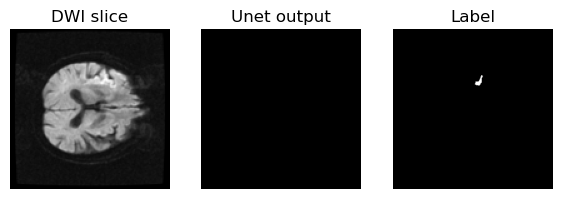

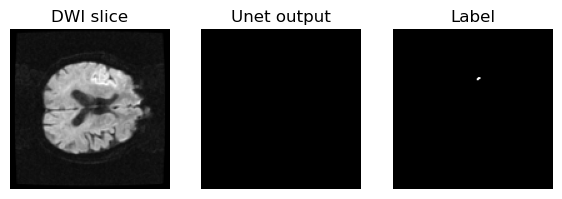

Mean slice dice for subject: 0.201
Volume dice for subject: 0.18
__________________________________


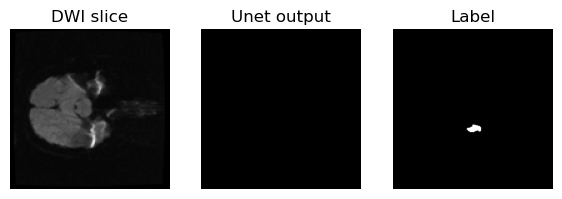

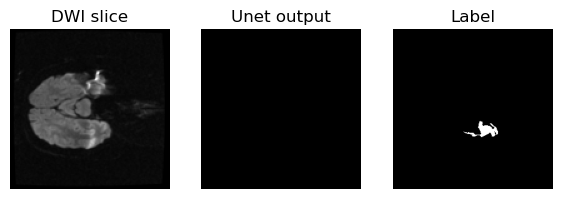

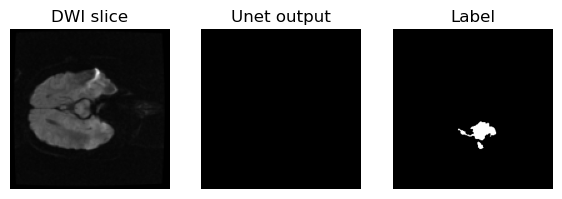

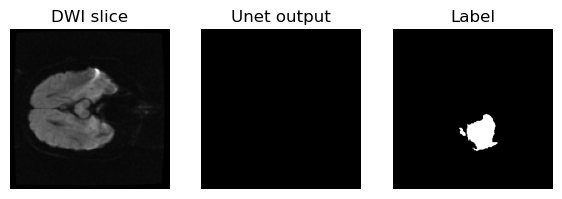

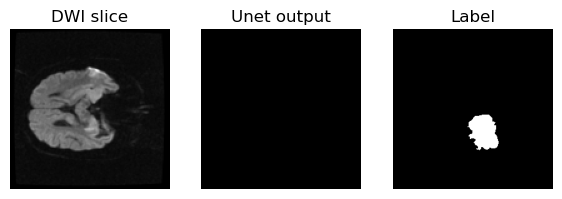

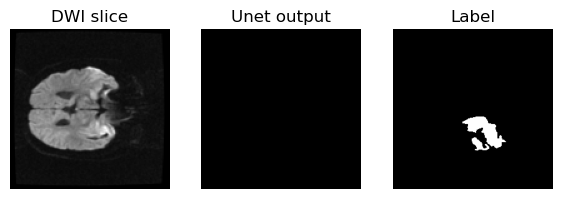

Dice for slice: 0.0


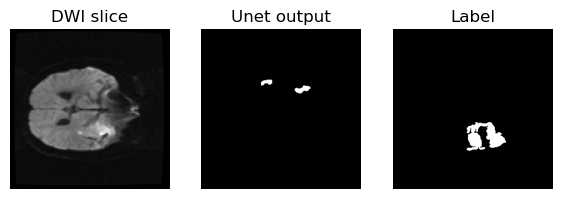

Dice for slice: 0.0


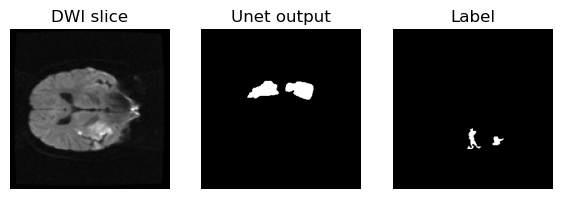

Dice for slice: 0.0


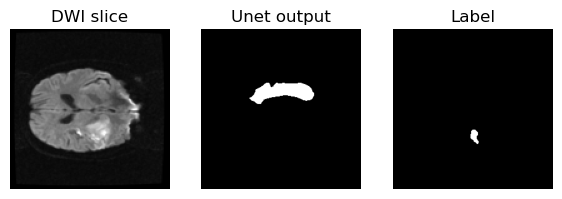

Dice for slice: 0.0


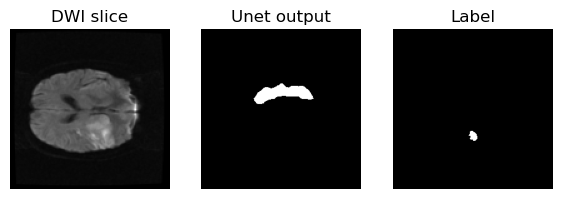

Dice for slice: 0
Mean slice dice for subject: 0.0
Volume dice for subject: 0.0
__________________________________


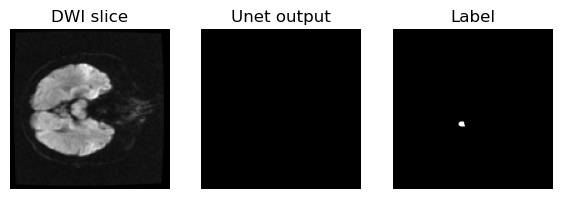

Dice for slice: 0
Dice for slice: 0.0


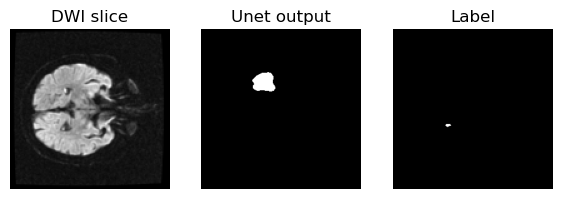

Dice for slice: 0.0


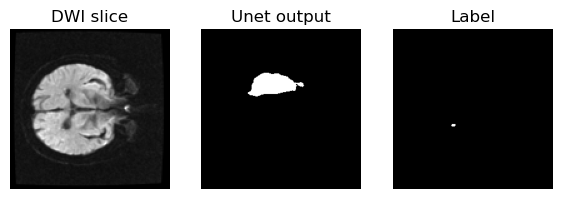

Dice for slice: 0.0


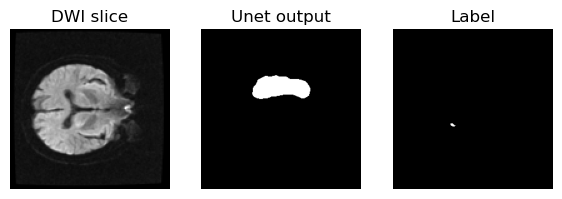

Dice for slice: 0
Dice for slice: 0
Mean slice dice for subject: 0.0
Volume dice for subject: 0.0
__________________________________


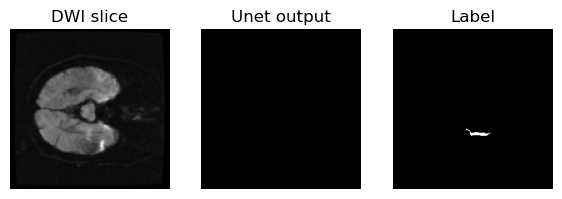

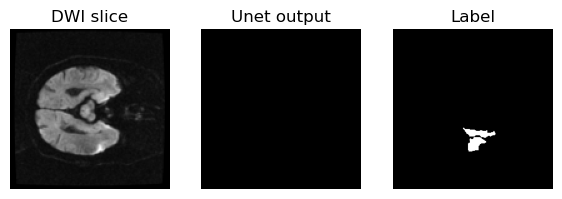

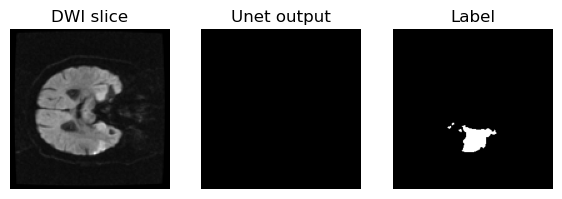

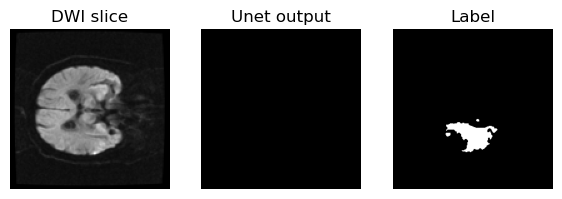

Dice for slice: 0.0


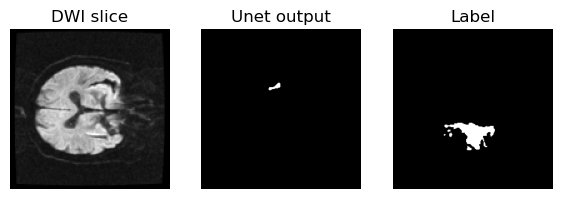

Dice for slice: 0.0


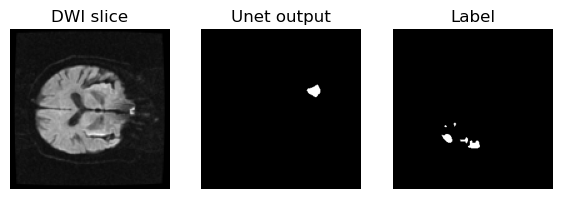

Dice for slice: 0.0


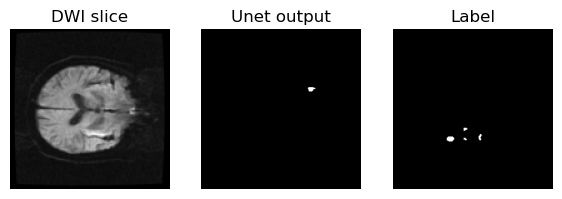

Mean slice dice for subject: 0.0
Volume dice for subject: 0.0
__________________________________


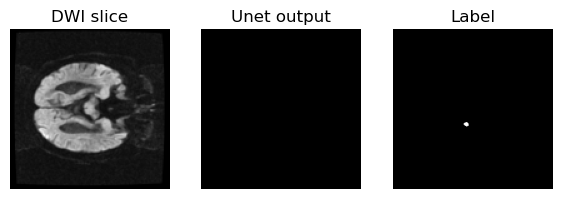

Dice for slice: 0.0


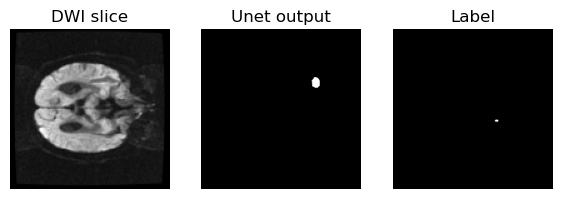

Dice for slice: 0.0


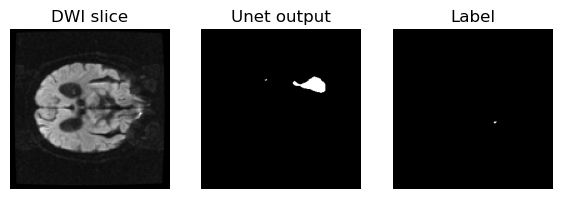

Dice for slice: 0.0


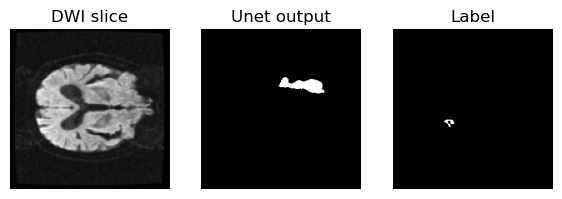

Dice for slice: 0.0


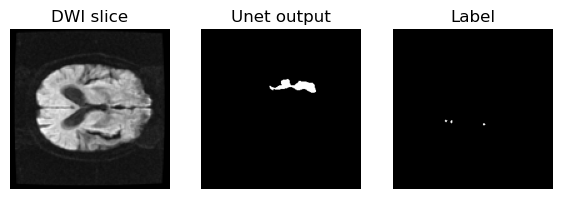

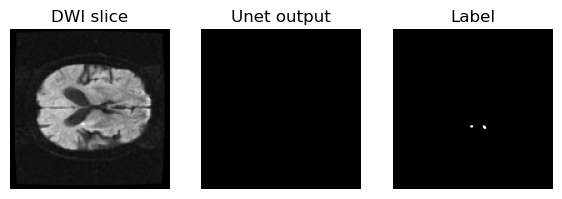

Mean slice dice for subject: 0.0
Volume dice for subject: 0.0
__________________________________


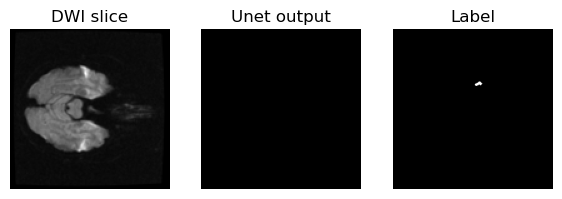

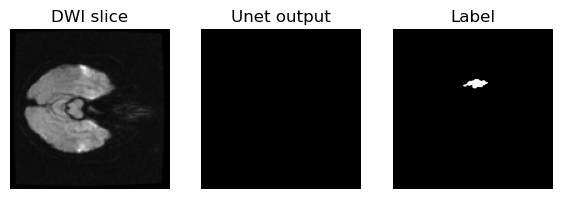

Dice for slice: 0.148


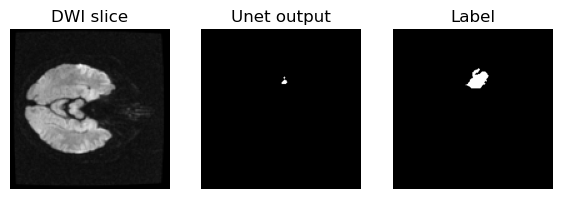

Dice for slice: 0.527


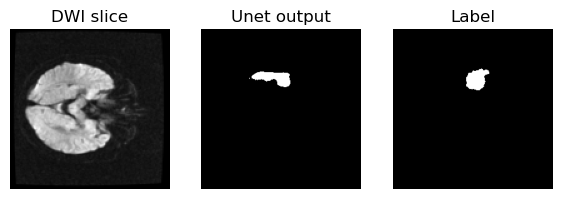

Dice for slice: 0.308


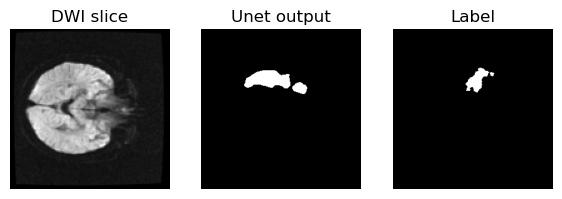

Dice for slice: 0.138


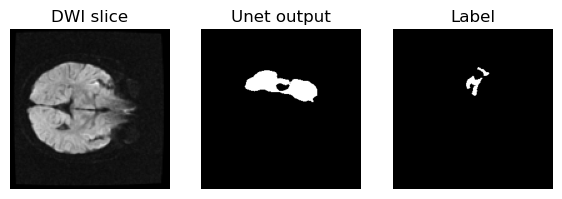

Dice for slice: 0.024


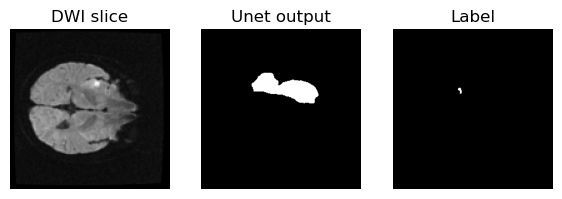

Dice for slice: 0.0


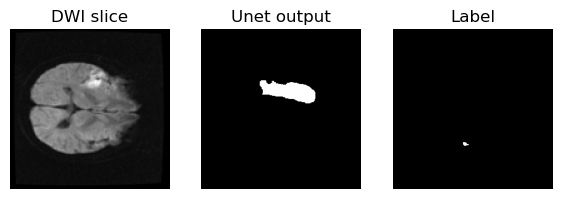

Dice for slice: 0.041


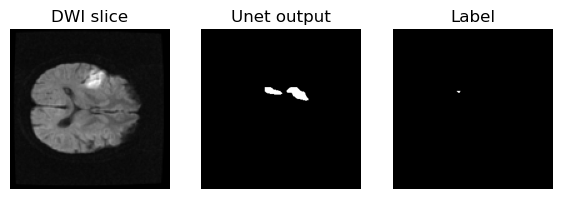

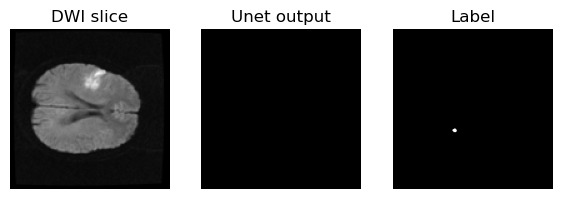

Mean slice dice for subject: 0.169
Volume dice for subject: 0.167
__________________________________
_____________________________________________________
Mean slice dice for each subject: [0.0684265494368327, 0, 0.2005432071547828, 0.0, 0.0, 0.0, 0.0, 0.16936602133503845]
Volume dice for each subject: [0.0579978813559322, 0.0, 0.17954198473282443, 0.0, 0.0, 0.0, 0.0, 0.1669771613882564]

Mean slice dice for all subjects: 0.054791972240831745
Mean volume dice for all subjects: 0.05056462843462663


In [5]:
#Test loop:
Dice_slices_subjects = [] #Slice based
Dice_slice_avg_subjects = [] #Slice based
Dice_vol_subjects = [] #Volume based
for x_val, yval in testDataLoader:
    with torch.cuda.amp.autocast():
        output = model(x_val.to(device))
    torch.cuda.empty_cache()
    
    # Dice and Plot
    dice_slices, dice_vol = plotAndDice(yval[0,0,:,:,:], x_val[0,0,:,:,:], output[0,0,:,:,:], trained_on_dataset)
    Dice_vol_subjects.append(dice_vol)
    Dice_slices_subjects.append(dice_slices)
    Dice_slice_avg_subjects.append(mean(dice_slices))
    
    print('Mean slice dice for subject:', round(mean(dice_slices),3))
    print('Volume dice for subject:', round(dice_vol,3))
    print('__________________________________')
print('_____________________________________________________')
print('Mean slice dice for each subject:', Dice_slice_avg_subjects)
print('Volume dice for each subject:', Dice_vol_subjects)
print('')
print('Mean slice dice for all subjects:', mean(Dice_slice_avg_subjects))
print('Mean volume dice for all subjects:', mean(Dice_vol_subjects))

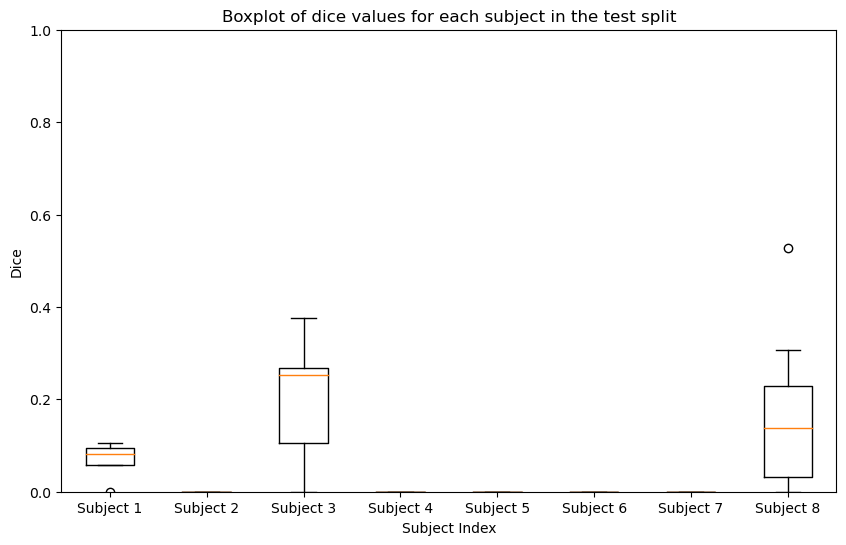

In [6]:
# Example data: a list of lists
data = Dice_slices_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()